# Final Project Report

* Class: DS 5100
* Student Name: Alanna Hazlett
* Student Net ID: uwa6xv
* This URL: https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo

# Instructions

Follow the instructions in the [Final Project](https://ontoligent.github.io/DS5100-2023-07-R/notebooks/M00_FinalProject/FinalProjectInstructions.html) isntructions and put your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

Write a unit test file using the Unittest package containing at least one method for each method in each of the three classes above. \
As a general rule, each test method should verify that the target method creates an appropriate data structure.

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [1]:
!pip install montecarlo

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from montecarlo import montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [3]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  Utilizes game object to analyze and display the results of the game.
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Receives game object, checks to make sure it is a game object, and initalizes it.
     |      INPUT: game object.
     |  
     |  count_combo(self)
     |      Computes the distinct combinations of faces rolled, along with their counts.
     |      OUTPUT: combinations, a pandas DataFrame with Index of distinct combinations and a column for the associated counts.
     |  
     |  count_permutation(self)
     |      Computes the distinct permutations of faces rolled, along with their counts.
     |      OUTPUT: perm, a pandas DataFrame that has a MultiIndex of distinct permutations and a column for 

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:https://github.com/AlannaHazlett/uwa6xv_ds5100_montecarlo/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [4]:
from montecarlo.montecarlo import Die, Game, Analyzer

In [5]:
import numpy as np
import pandas as pd
import itertools

In [6]:
coin_faces = np.array(["H","T"])
fair_coin = Die(coin_faces)
fair_coin.current_state()

,weights
faces,
H,1.0
T,1.0


In [7]:
unfair_coin = Die(coin_faces)
unfair_coin.change_weight("H",5)
unfair_coin.current_state()

,weights
faces,
H,5.0
T,1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [8]:
game1 = Game([fair_coin,fair_coin])
game1.play(1000)
game1.show_result()

,0,1
Roll Number,,
1,H,T
2,T,H
3,T,T
4,H,H
5,H,H
...,...,...
996,T,T
997,T,T
998,H,T


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [9]:
game2 = Game([fair_coin,unfair_coin,unfair_coin])
game2.play(1000)
game2.show_result()

,0,1,2
Roll Number,,,
1,T,H,H
2,T,H,H
3,H,H,H
4,H,H,H
5,T,T,H
...,...,...,...
996,T,H,H
997,H,H,H
998,H,H,H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [35]:
analyzer1 = Analyzer(game1)
print(analyzer1.game._df2.value_counts())
analyzer1.jackpot()

0  1
T  H    278
   T    249
H  H    241
   T    232
Name: count, dtype: int64


490

In [36]:
analyzer2 = Analyzer(game2)
print(analyzer2.game._df2.value_counts())
analyzer2.jackpot()

0  1  2
H  H  H    334
T  H  H    326
      T     88
   T  H     79
H  H  T     71
   T  H     64
T  T  T     21
H  T  T     17
Name: count, dtype: int64


355

Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [12]:
rel_freq1 = analyzer1.jackpot()/len(analyzer1.game._df2)
rel_freq1

0.49

In [13]:
rel_freq2 = analyzer2.jackpot()/len(analyzer2.game._df2)
rel_freq2

0.355

Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

<Axes: xlabel='Game'>

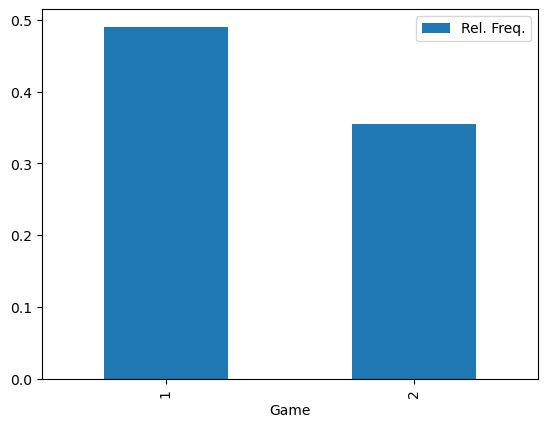

In [14]:
test_df = pd.DataFrame({'Game' :['1','2'], 'Rel. Freq.':[rel_freq1,rel_freq2]})
test_df.plot.bar(x='Game',y='Rel. Freq.')

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [15]:
faces = np.array([1,2,3,4,5,6])
die1 = Die(faces)
die2 = Die(faces)
die3 = Die(faces)

Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [16]:
die1.change_weight(6,5)
die1._df

,weights
faces,
1,1.0
2,1.0
3,1.0
4,1.0
5,1.0
6,5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [17]:
die2.change_weight(1,5)
die2._df

,weights
faces,
1,5.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [18]:
fair_die_game = Game([die3,die3,die3,die3,die3])

In [19]:
fair_die_game.play(10000)
fair_die_game.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,4,4,6,2,1
2,6,1,3,3,5
3,4,6,2,1,3
4,3,1,3,5,4
5,3,3,6,6,5
...,...,...,...,...,...
9996,6,4,1,3,4
9997,6,1,3,2,4
9998,6,3,6,1,1


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [20]:
unfair_die_game = Game([die1,die2,die3,die3,die3])
unfair_die_game.play(10000)
unfair_die_game.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,6,4,5,3,2
2,4,1,4,5,5
3,6,4,3,6,2
4,1,4,4,6,5
5,4,3,1,6,2
...,...,...,...,...,...
9996,1,1,5,4,5
9997,6,6,4,6,3
9998,1,1,5,5,2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

In [21]:
fair_die_analyze = Analyzer(fair_die_game)
fair_die_jack_freq = fair_die_analyze.jackpot()/len(fair_die_analyze.game._df2)
fair_die_jack_freq

0.0004

In [22]:
unfair_die_analyze = Analyzer(unfair_die_game)
unfair_die_jack_freq = unfair_die_analyze.jackpot()/len(unfair_die_analyze.game._df2)
unfair_die_jack_freq

0.0005

<Axes: xlabel='Game'>

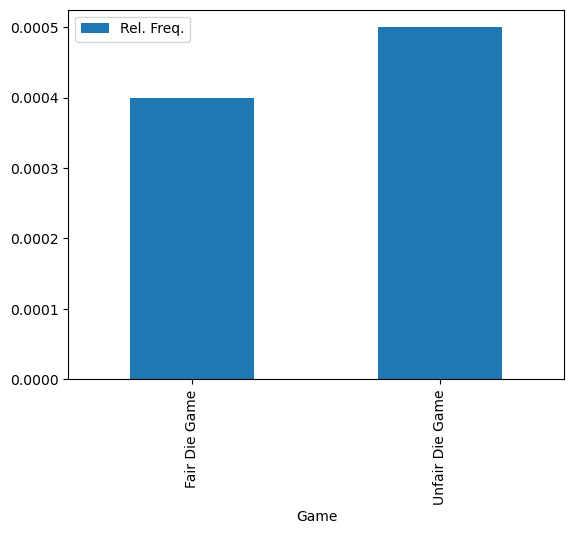

In [23]:
test_df = pd.DataFrame({'Game' :['Fair Die Game','Unfair Die Game'], 'Rel. Freq.':[fair_die_jack_freq,unfair_die_jack_freq]})
test_df.plot.bar(x='Game',y='Rel. Freq.')

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [24]:
letters = pd.read_csv("english_letters.txt", sep=" ", header=None, names = ["Letter","Frequency"])

let_nump = letters["Letter"].to_numpy()
freq_list = list(letters["Frequency"])
letter_die = Die(let_nump)
print(letter_die.current_state())

for i in range(len(freq_list)):
    letter_die.change_weight(let_nump[i],freq_list[i]) 
    
letter_die.current_state()

       weights
faces         
E          1.0
T          1.0
A          1.0
O          1.0
I          1.0
N          1.0
S          1.0
R          1.0
H          1.0
L          1.0
D          1.0
C          1.0
U          1.0
M          1.0
F          1.0
G          1.0
P          1.0
W          1.0
Y          1.0
B          1.0
V          1.0
K          1.0
J          1.0
X          1.0
Z          1.0
Q          1.0


,weights
faces,
E,529117365.0
T,390965105.0
A,374061888.0
O,326627740.0
I,320410057.0
N,313720540.0
S,294300210.0
R,277000841.0
H,216768975.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [25]:
letter_game = Game([letter_die,letter_die,letter_die,letter_die])
letter_game.play(1000)
letter_game.show_result()

,0,1,2,3
Roll Number,,,,
1,S,A,G,W
2,H,A,U,A
3,O,B,I,R
4,D,I,N,V
5,T,N,E,C
...,...,...,...,...
996,E,A,D,N
997,S,R,T,R
998,C,E,F,A


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [26]:
letter_analyze = Analyzer(letter_game)
letter_result_df = letter_analyze.count_permutation()
letter_result_df

count
0 1 2 3       
A A A P      1
    G P      1
    I O      1
      Y      1
    L D      1
...        ...
Y T N S      1
  Y S E      1
    T O      1
Z E L M      1
  U A F      1

[995 rows x 1 columns]

In [27]:
scrabble_words = pd.read_csv("scrabble_words.txt", sep=" ", header=None, names = ["Words"])
scrabble_words_4=scrabble_words[scrabble_words.Words.apply(lambda x: len(str(x)))==4]
scrabble_words_4

,Words
4,AAHS
8,AALS
23,ABAC
63,ABAS
109,ABBA
...,...
279358,ZUPA
279364,ZURF
279380,ZYGA
279448,ZYME


In [28]:
difference_4 = len(scrabble_words_4) - len(letter_result_df)
game_word_result_4 = len(letter_result_df)
possible_words_4 = len(scrabble_words_4)
print(f"The 4 letter game resulted in {game_word_result_4} out of {possible_words_4} possible words, resulting in a difference of {difference_4}.")

The 4 letter game resulted in 995 out of 5637 possible words, resulting in a difference of 4642.


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [29]:
letter_game = Game([letter_die,letter_die,letter_die,letter_die,letter_die])
letter_game.play(1000)
letter_game.show_result()

,0,1,2,3,4
Roll Number,,,,,
1,C,T,I,U,L
2,E,C,A,I,U
3,E,S,D,E,K
4,P,R,A,N,S
5,L,R,S,H,O
...,...,...,...,...,...
996,E,C,S,N,Y
997,O,O,G,N,C
998,E,R,I,T,E


In [30]:
letter_analyze2 = Analyzer(letter_game)
letter_result_df2 = letter_analyze2.count_permutation()
letter_result_df2

count
0 1 2 3 4       
A A E S Q      1
      T I      1
    H I A      1
        D      1
    N N G      1
...          ...
Y R I T T      1
  T E H H      1
    N Y V      1
    O L L      1
  U H A I      1

[1000 rows x 1 columns]

In [31]:
scrabble_words_5=scrabble_words[scrabble_words.Words.apply(lambda x: len(str(x)))==5]
scrabble_words_5

,Words
2,AAHED
6,AALII
13,AARGH
16,AARTI
24,ABACA
...,...
279367,ZUZIM
279383,ZYGAL
279421,ZYGON
279449,ZYMES


In [32]:
difference_5 = len(scrabble_words_5) - len(letter_result_df2)
game_word_result_5 = len(letter_result_df2)
possible_words_5 = len(scrabble_words_5)
print(f"The 5 letter game resulted in {game_word_result_5} out of {possible_words_5} possible words, resulting in a difference of {difference_5}.")

The 5 letter game resulted in 1000 out of 12972 possible words, resulting in a difference of 11972.


In [33]:
if game_word_result_5 > game_word_result_4:
    diff_5_4 = game_word_result_5 - game_word_result_4
    print(f"The game with 5 letters resulted in more words being found, with {diff_5_4} more words than the 4 letter game.")
elif game_word_result_4 > game-word_result_5:
    diff_4_5 = game_word_result_4 - game_word_result_5
    print(f"The game with 4 letters resulted in more words being found, with {diff_4_5} more words than the 5 letter game.")
else:
    print("Uh oh, something happened!")    

The game with 5 letters resulted in more words being found, with 5 more words than the 4 letter game.


# Submission

When finished completing the above tasks, save this file to your local repo (and within your project), and them push it to your GitHub repo.

Then convert this file to a PDF and submit it to GradeScope according to the assignment instructions in Canvas.